In [4]:
import sys
from pathlib import Path
import pandas as pd

SRC_PATH = Path.cwd().parent / "src"
sys.path.append(str(SRC_PATH))

from outliers import detect_outliers_iqr

DATA_IN = Path("../data/processed/ko_cleaned.parquet")
df = pd.read_parquet(DATA_IN)
df.head()



,Date,close,daily_ret,log_ret
0,2000-01-03,13.815726,NaN,NaN
1,2000-01-04,13.831048,0.001109,0.001108
2,2000-01-05,13.953581,0.008859,0.008820
3,2000-01-06,13.968897,0.001098,0.001097
4,2000-01-07,14.887897,0.065789,0.063715


In [5]:
target_col = "daily_ret"   # o "log_ret"
mask_iqr, bounds = detect_outliers_iqr(df[target_col], k=1.5, return_bounds=True)
df["outlier_iqr"] = mask_iqr

print("Cutoffs (Q1-1.5*IQR, Q3+1.5*IQR):", bounds)
df["outlier_iqr"].mean()  # fracción de filas marcadas


Cutoffs (Q1-1.5*IQR, Q3+1.5*IQR): (-0.02302108123534044, 0.023753060302261958)


np.float64(0.06374069478908188)

In [6]:
summ_all = df[target_col].describe()[["mean","50%","std"]].rename({"50%":"median"})
summ_flt = df.loc[~df["outlier_iqr"], target_col].describe()[["mean","50%","std"]].rename({"50%":"median"})
pd.concat({"all": summ_all, "filtered_iqr": summ_flt}, axis=1)


,all,filtered_iqr
mean,0.000336,0.000473
median,0.000447,0.000479
std,0.012873,0.008623


C:\Users\marti\AppData\Local\Temp\ipykernel_17156\3530214742.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[target_col].dropna(),


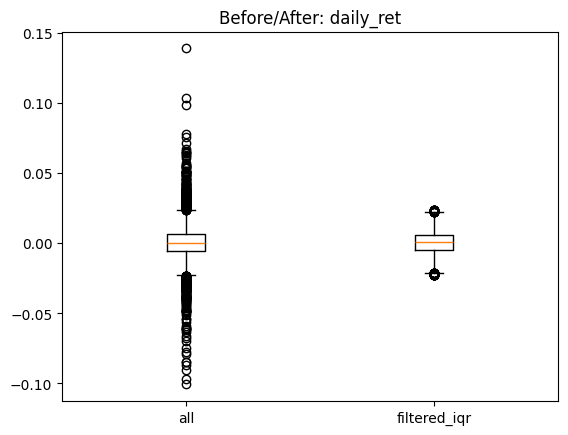

In [7]:
plt.figure()
plt.boxplot([df[target_col].dropna(),
             df.loc[~df["outlier_iqr"], target_col].dropna()],
            labels=["all","filtered_iqr"])
plt.title(f"Before/After: {target_col}")
plt.show()


In [8]:
OUT_FLAGGED = Path("../data/processed/ko_with_outlier_flag.parquet")
df.to_parquet(OUT_FLAGGED, index=False)
OUT_FLAGGED

OUT_FILTERED = Path("../data/processed/ko_no_outliers.parquet")
df.loc[~df["outlier_iqr"]].to_parquet(OUT_FILTERED, index=False)
OUT_FILTERED


WindowsPath('../data/processed/ko_no_outliers.parquet')

Description in the project's root README